In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
import math

In [2]:
P0 = np.array([2,4,1])
P0_derivative = np.array([2,4,2])
P1 = np.array([3,5,2])
P2 = np.array([5,4,3])
P3 = np.array([7,5,2])
P4 = np.array([15,1,8])
P5 = np.array([15,1,8])
P5_derivative = np.array([4,3,1])
P = np.concatenate((P0,P5))
P_derivative = np.concatenate((P0_derivative, P5_derivative))

In [3]:
M_d = np.array(([4,1,0,0],[1,4,1,0] , [0,1,4,1] , [0,0,1,4]))
M_d

array([[4, 1, 0, 0],
       [1, 4, 1, 0],
       [0, 1, 4, 1],
       [0, 0, 1, 4]])

In [4]:
U_x = np.array(([-3*P0[0] + 3*P2[0]-P0_derivative[0]],[-3*P1[0] + 3*P3[0]],[-3*P2[0] + 3*P4[0]],[-3*P3[0] + 3*P5[0] - P5_derivative[0]]))
U_y = np.array(([-3*P0[1] + 3*P2[1]-P0_derivative[1]],[-3*P1[1] + 3*P3[1]],[-3*P2[1] + 3*P4[1]],[-3*P3[1] + 3*P5[1] - P5_derivative[1]]))
U_z = np.array(([-3*P0[2] + 3*P2[2]-P0_derivative[2]],[-3*P1[2] + 3*P3[2]],[-3*P2[2] + 3*P4[2]],[-3*P3[2] + 3*P5[2] - P5_derivative[2]]))

In [5]:
A_x = np.matmul(inv(M_d),U_x)
A_y = np.matmul(inv(M_d),U_y)
A_z = np.matmul(inv(M_d),U_z)

In [6]:
P1_derivative = np.array(([A_x[0]],[A_y[0]],[A_z[0]]))
P2_derivative = np.array(([A_x[1]],[A_y[1]],[A_z[1]]))
P3_derivative = np.array(([A_x[2]],[A_y[2]],[A_z[2]]))
B_x_1 = np.zeros((4,1))
B_y_1 = np.zeros((4,1))
B_z_1 = np.zeros((4,1))
B_x_2 = np.zeros((4,1))
B_y_2 = np.zeros((4,1))
B_z_2 = np.zeros((4,1))
B_x_3 = np.zeros((4,1))
B_y_3 = np.zeros((4,1))
B_z_3 = np.zeros((4,1))
B_x_4 = np.zeros((4,1))
B_y_4 = np.zeros((4,1))
B_z_4 = np.zeros((4,1))

In [7]:
#Between P0 and P1 #MB01
M = np.array(([1,0,0,0],[0,0,1,0] , [-3,3,-2,-1] , [2,-2,1,1]))
np.put(B_x_1, [0], P0[0])
np.put(B_x_1, [1], P1[0])
np.put(B_x_1, [2], P0_derivative[0])
np.put(B_x_1, [3], P1_derivative[0])
np.put(B_y_1, [0], P0[1])
np.put(B_y_1, [1], P1[1])
np.put(B_y_1, [2], P0_derivative[1])
np.put(B_y_1, [3], P1_derivative[1])
np.put(B_z_1, [0], P0[2])
np.put(B_z_1, [1], P1[2])
np.put(B_z_1, [2], P0_derivative[2])
np.put(B_z_1, [3], P1_derivative[2])

In [8]:
#Between P1 and P2 #MB12
np.put(B_x_2, [0], P1[0])
np.put(B_x_2, [1], P2[0])
np.put(B_x_2, [2], P1_derivative[0])
np.put(B_x_2, [3], P2_derivative[0])
np.put(B_y_2, [0], P1[1])
np.put(B_y_2, [1], P2[1])
np.put(B_y_2, [2], P1_derivative[1])
np.put(B_y_2, [3], P2_derivative[1])
np.put(B_z_2, [0], P1[2])
np.put(B_z_2, [1], P2[2])
np.put(B_z_2, [2], P1_derivative[2])
np.put(B_z_2, [3], P2_derivative[2])

In [9]:
#Between P2 and P3 #MB23
np.put(B_x_3, [0], P2[0])
np.put(B_x_3, [1], P3[0])
np.put(B_x_3, [2], P2_derivative[0])
np.put(B_x_3, [3], P3_derivative[0])
np.put(B_y_3, [0], P2[1])
np.put(B_y_3, [1], P3[1])
np.put(B_y_3, [2], P2_derivative[1])
np.put(B_y_3, [3], P3_derivative[1])
np.put(B_z_3, [0], P2[2])
np.put(B_z_3, [1], P3[2])
np.put(B_z_3, [2], P2_derivative[2])
np.put(B_z_3, [3], P3_derivative[2])

In [10]:
#Between P3 and P5 MB35
np.put(B_x_4, [0], P3[0])
np.put(B_x_4, [1], P5[0])
np.put(B_x_4, [2], P3_derivative[0])
np.put(B_x_4, [3], P5_derivative[0])
np.put(B_y_4, [0], P3[1])
np.put(B_y_4, [1], P5[1])
np.put(B_y_4, [2], P3_derivative[1])
np.put(B_y_4, [3], P5_derivative[1])
np.put(B_z_4, [0], P3[2])
np.put(B_z_4, [1], P5[2])
np.put(B_z_4, [2], P3_derivative[2])
np.put(B_z_4, [3], P5_derivative[2])

In [11]:
MB01_x = np.matmul(M,B_x_1)
MB01_y = np.matmul(M,B_y_1)
MB01_z = np.matmul(M,B_z_1)
MB12_x = np.matmul(M,B_x_2)
MB12_y = np.matmul(M,B_y_2)
MB12_z = np.matmul(M,B_z_2)
MB23_x = np.matmul(M,B_x_3)
MB23_y = np.matmul(M,B_y_3)
MB23_z = np.matmul(M,B_z_3)
MB35_x = np.matmul(M,B_x_4)
MB35_y = np.matmul(M,B_y_4)
MB35_z = np.matmul(M,B_z_4)

In [12]:
h01 = math.sqrt((P1[0] - P0[0])**2 + (P1[1] - P0[1])**2 + (P1[2] - P0[2])**2)
h12 = math.sqrt((P2[0] - P1[0])**2 + (P2[1] - P1[1])**2 + (P2[2] - P1[2])**2)
h23 = math.sqrt((P3[0] - P2[0])**2 + (P3[1] - P2[1])**2 + (P3[2] - P2[2])**2)
h35 = math.sqrt((P5[0] - P3[0])**2 + (P5[1] - P3[1])**2 + (P5[2] - P3[2])**2)

In [13]:
T01 = np.zeros((100,4))
T12 = np.zeros((100,4))
T23 = np.zeros((100,4))
T35 = np.zeros((100,4))
i = 0
for u in np.linspace(0,1,100):
    T01[i][:] = [1, u*h01, (u**2)*(h01**2), (u**3)*(h01**3)]
    T12[i][:] = [1, u*h12, (u**2)*(h12**2), (u**3)*(h12**3)]
    T23[i][:] = [1, u*h23, (u**2)*(h23**2), (u**3)*(h23**3)]
    T35[i][:] = [1, u*h35, (u**2)*(h35**2), (u**3)*(h35**3)]
    i = i + 1

In [14]:
X01 = np.zeros((100,4)) + 1
X12 = np.zeros((100,4)) + 1
X23 = np.zeros((100,4)) + 1
X35 = np.zeros((100,4)) + 1
J01 = [1 , (1/h01), (1/(h01)**2), (1/(h01)**3)]
J12 = [1 , (1/h12), (1/(h12)**2), (1/(h12)**3)]
J23 = [1 , (1/h23), (1/(h23)**2), (1/(h23)**3)]
J35 = [1 , (1/h35), (1/(h35)**2), (1/(h35)**3)]

In [15]:
X01 = X01*J01
X12 = X12*J12
X23 = X23*J23
X35 = X35*J35
X01 = np.matrix.transpose(X01)
X12 = np.matrix.transpose(X12)
X23 = np.matrix.transpose(X23)
X35 = np.matrix.transpose(X35)

In [16]:
U01 = np.matmul(T01,X01)
U12 = np.matmul(T12,X12)
U23 = np.matmul(T23,X23)
U35 = np.matmul(T35,X35)
U01.shape
MB01_x.shape

(4, 1)

In [17]:
P = np.zeros((100,4))
i = 0
for u in np.linspace(0,1,100):
    P[i][:] = [1, u, (u*u), (u*u*u)]
    i = i + 1

In [19]:
F_x01 = np.matmul(P,MB01_x) 
F_y01 = np.matmul(P,MB01_y)
F_z01 = np.matmul(P,MB01_z)
F_x12 = np.matmul(P,MB12_x) 
F_y12 = np.matmul(P,MB12_y)
F_z12 = np.matmul(P,MB12_z)
F_x23 = np.matmul(P,MB23_x) 
F_y23 = np.matmul(P,MB23_y)
F_z23 = np.matmul(P,MB23_z)
F_x35 = np.matmul(P,MB35_x) 
F_y35 = np.matmul(P,MB35_y)
F_z35 = np.matmul(P,MB35_z)

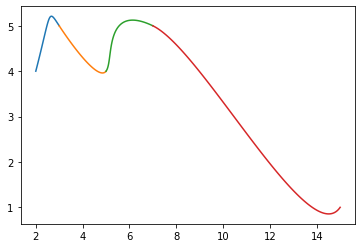

In [20]:
#Plot on 2D Surface using two coordinates
plt.plot(F_x01,F_y01)
plt.plot(F_x12,F_y12)
plt.plot(F_x23,F_y23)
plt.plot(F_x35,F_y35)
plt.show()

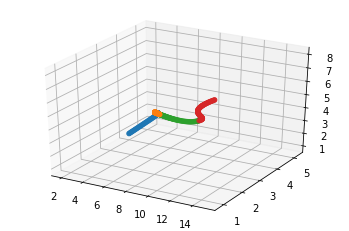

In [21]:
#3D Scatter plot using three coordinates
ax = plt.axes(projection='3d')
ax.scatter3D(F_x01,F_y01,F_z01)
ax.scatter3D(F_x12,F_y12,F_z12)
ax.scatter3D(F_x23,F_y23,F_z23)
ax.scatter3D(F_x35,F_y35,F_z35)